<img src=https://api-manager.universia.net/coreplatform-document-management/api/document-management/public/6ra7ymjkfi64845 width="300" align="left">
<br />

# Aprendizaje automático II
#### <font color=green>*Máster en Informática Industrial y Robótica*</font>

#### Importación de las librerías:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from entrada_salida import normalizar_entradas
from cargar_imagen import cargar_imagenes, create_folder,save_and_resize,comparativa_redim
from datos_csv import cargar_csv
from funcion_aux import cajas, saveToExcel
from tecnicas import pca, km, knn, rf, dtc, conv
from contraste_hipotesis import contraste
from timeit import timeit

#### Lectura de los datos:

La creación del directorio dataset/Data_Images64x64 falló o ya existe
4 hilos en ejecución...
Tiempo de ejecución redimension con 4 hilos:  9.16994980000004 s
Comparariva imagenes redimensionadas y originales:


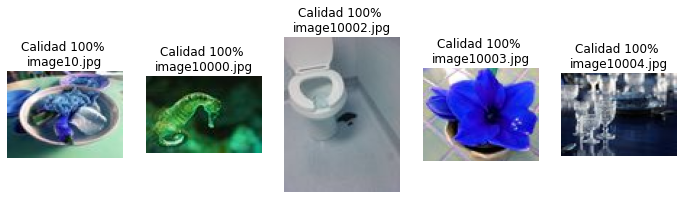

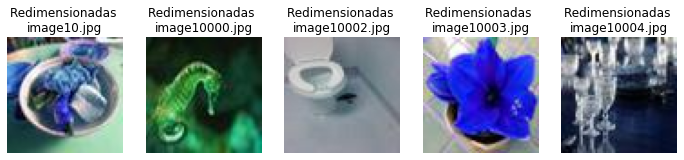

In [5]:
resolucion=64
n_hilos=4
# Crear directorio
create_folder('dataset/Data_Images64x64')
t1 = timeit("save_and_resize('dataset/Data Images','dataset/Data_Images64x64', resolucion,n_hilos)",
                globals=globals(), number=1)            
print("Tiempo de ejecución redimension con", str(n_hilos), "hilos: ", str(t1), "s")
comparativa_redim('dataset/Data Images','dataset/Data_Images64x64')

In [4]:
print("Comienzo del ordenamiento de datos")
dato_entrada, t_num = cargar_csv('dataset/Data.csv', 'dataset/Data Images','dataset/Data_Images64x64', {'Food': 0, 'Attire': 1, 'Decorationandsignage':2, 'misc':3})
print("Fin del ordenamiento de datos")


Comienzo del ordenamiento de datos
Fin del ordenamiento de datos


#### Normalizar datos:

In [5]:
print("Normalizar entradas....")
X_1D_norm, X_3Dnorm = normalizar_entradas(dato_entrada)

Normalizar entradas....


#### Reducción de la dimensionalidad:

Iniciando reduccion de la dimensionalidad con PCA


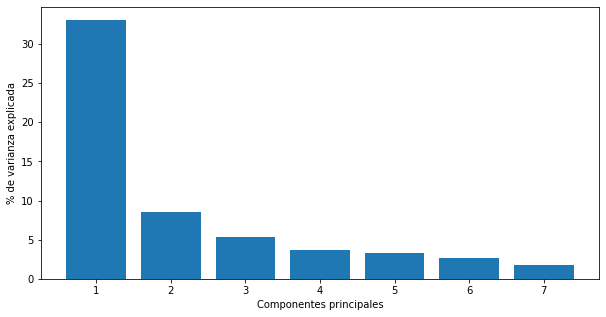

In [49]:
# Reduccion de la dimensionalidad para entrenar las regresiones del sklearn
# Se pasan de 12288 elementos a 30
print("Iniciando reduccion de la dimensionalidad con PCA")
n_components = 7
plt.figure(figsize=(10,5))
plt.ylabel("% de varianza explicada");
plt.xlabel('Componentes principales');
PCA, X_1D_reduced = pca(X = X_1D_norm, n_components = n_components)
plt.bar(np.arange(1, len(PCA.explained_variance_ratio_) + 1), PCA.explained_variance_ratio_ * 100)
plt.show(block=True)

#### Clustering:

Iniciando clusterizacion con k-medias


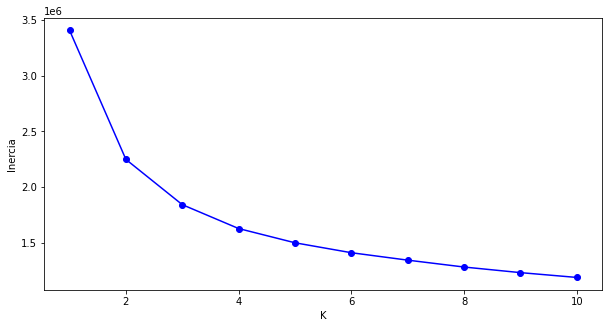

In [50]:
print("Iniciando clusterizacion con k-medias")
n_clusters = 10
inercias = []

for n_cluster in range(1,n_clusters+1):
    #print('Con', n_cluster,'clusters') X_1D_norm
    #kmeans = km(X = X_1D_norm, clusters = n_cluster)
    kmeans = km(X = X_1D_reduced, clusters = n_cluster)
    inercias.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
_ = plt.plot(np.arange(1, len(inercias) + 1), inercias,'bo')
_ = plt.plot(np.arange(1, len(inercias) + 1), inercias,'b')
plt.ylabel('Inercia')
plt.xlabel('K')
plt.show()
plt.show(block=True)

[1 3 3 ... 1 0 3]


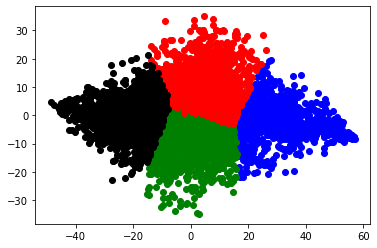

In [52]:
from sklearn.cluster import KMeans
K=4
kmeans= KMeans(n_clusters=K, random_state=0)
label = kmeans.fit_predict(X_1D_reduced)
print(label)
filtered_label0 = X_1D_reduced[label == 0]
filtered_label1 = X_1D_reduced[label == 1]
filtered_label2 = X_1D_reduced[label == 2]
filtered_label3 = X_1D_reduced[label == 3]
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'green')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'black')
plt.show()

### 

Iniciando entrenamiento RF
Con CV = 5 y trees = 10
Con CV = 5 y trees = 20
Con CV = 5 y trees = 30
Con CV = 5 y trees = 40
Con CV = 5 y trees = 50
Con CV = 5 y trees = 60
Con CV = 5 y trees = 70
Con CV = 5 y trees = 80
Con CV = 5 y trees = 90
Con CV = 5 y trees = 100


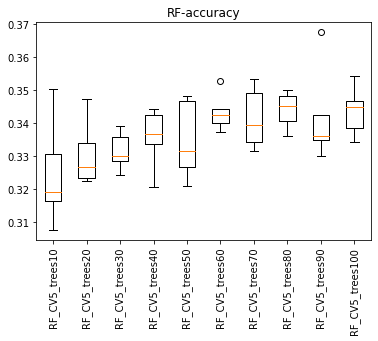

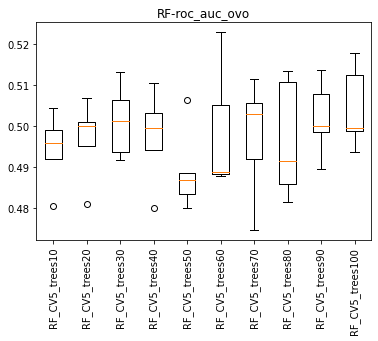

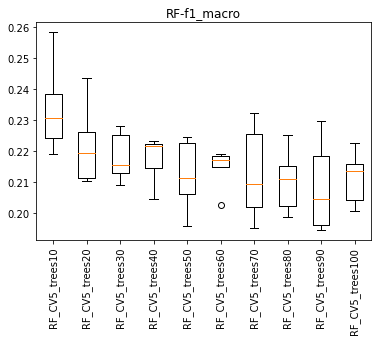

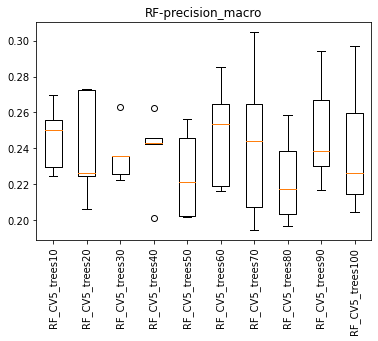

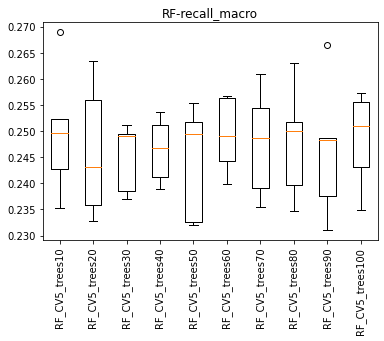

In [19]:
# Entrenamiento RF
print("Iniciando entrenamiento RF")
CV = np.arange(start = 5, stop = 6, step = 1)
trees = np.arange(start = 10, stop = 101, step = 10)
scoresRF = dict()

for cv in CV:
    for tree in trees:
        print('Con CV =', cv, 'y trees =', tree)
        scoresRF['RF_CV' + str(cv) + '_trees' + str(tree)] = rf(X = X_1D_reduced, Y = t_num, trees = tree, cv = cv)

# Imprimir graficas
for metric in ['accuracy','roc_auc_ovo','f1_macro', 'precision_macro', 'recall_macro']:
    cajas(scoresRF, metric, 'RF-' + str(metric))

Iniciando entrenamiento KNN
Con CV = 5 y neighbours = 10
Con CV = 5 y neighbours = 20
Con CV = 5 y neighbours = 30
Con CV = 5 y neighbours = 40
Con CV = 5 y neighbours = 50
Con CV = 5 y neighbours = 60
Con CV = 5 y neighbours = 70
Con CV = 5 y neighbours = 80
Con CV = 5 y neighbours = 90
Con CV = 5 y neighbours = 100


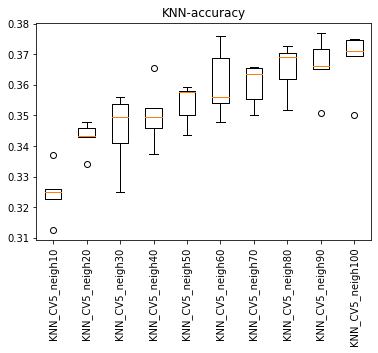

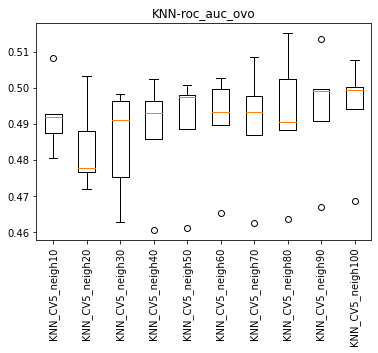

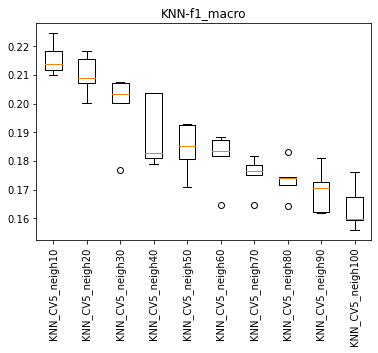

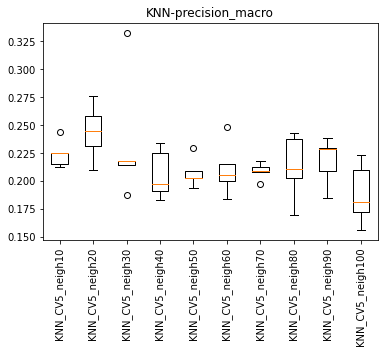

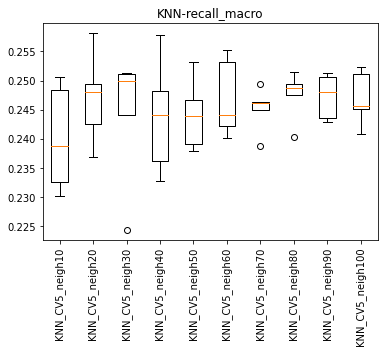

In [18]:
# Entrenamiento KNN
print("Iniciando entrenamiento KNN")
CV = np.arange(start = 5, stop = 6, step = 1)
neighbours = np.arange(start = 10, stop = 101, step = 10)
scoresKNN = dict()

for cv in CV:
    for neighbour in neighbours:
        print('Con CV =', cv, 'y neighbours =', neighbour)
        scoresKNN['KNN_CV' + str(cv) + '_neigh' + str(neighbour)] = knn(X = X_1D_reduced, Y = t_num, neighbours = neighbour, cv = cv)

# Imprimir graficas
for metric in ['accuracy','roc_auc_ovo','f1_macro', 'precision_macro', 'recall_macro']:
    cajas(scoresKNN, metric, 'KNN-' + str(metric))

Iniciando entrenamiento DTC
Con CV = 5 y splits = 2 y leafs = 1
Con CV = 5 y splits = 2 y leafs = 2
Con CV = 5 y splits = 2 y leafs = 3
Con CV = 5 y splits = 2 y leafs = 4
Con CV = 5 y splits = 3 y leafs = 1
Con CV = 5 y splits = 3 y leafs = 2
Con CV = 5 y splits = 3 y leafs = 3
Con CV = 5 y splits = 3 y leafs = 4
Con CV = 5 y splits = 4 y leafs = 1
Con CV = 5 y splits = 4 y leafs = 2
Con CV = 5 y splits = 4 y leafs = 3
Con CV = 5 y splits = 4 y leafs = 4


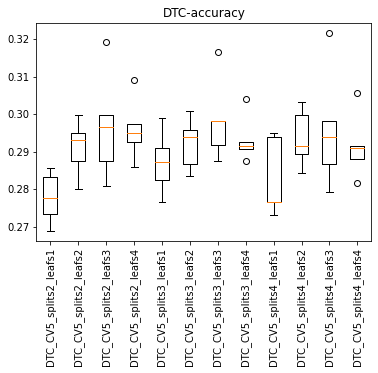

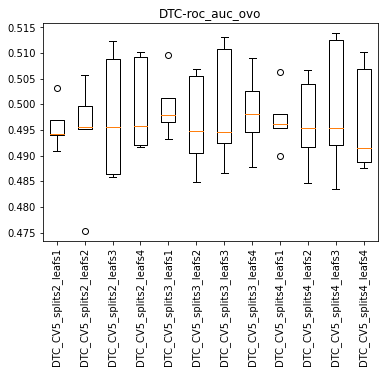

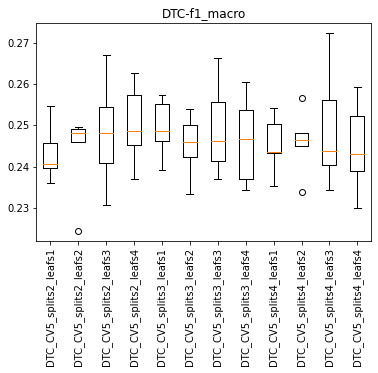

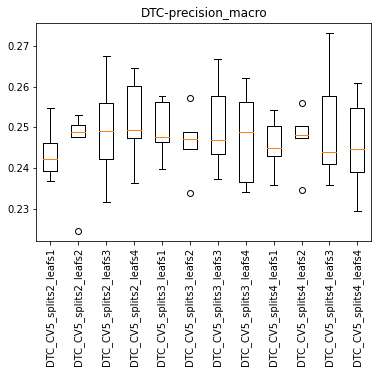

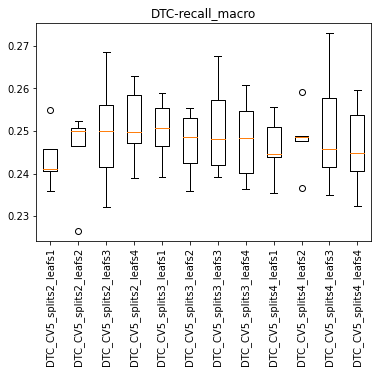

In [17]:
# Entrenamiento DTC
print("Iniciando entrenamiento DTC")
CV = np.arange(start = 5, stop = 6, step = 1)
splits = np.arange(start = 2, stop = 5, step = 1)
leafs = np.arange(start = 1, stop = 5, step = 1)
scoresDTC = dict()

for cv in CV:
    for split in splits:
        for leaf in leafs:
            print('Con CV =', cv, 'y splits =', split, 'y leafs =', leaf)
            scoresDTC['DTC_CV' + str(cv) + '_splits' + str(split) + '_leafs' + str(leaf)] = dtc(X = X_1D_reduced, Y = t_num, samples_split = split, samples_leaf = leaf, cv = cv)

# Imprimir graficas
for metric in ['accuracy','roc_auc_ovo','f1_macro', 'precision_macro', 'recall_macro']:
    cajas(scoresDTC, metric, 'DTC-' + str(metric))


Iniciando entrenamiento red convolucional con keras
Con CV = 2 , conNeurons = [ 8 16 16] y denseNeurons = [32  4]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        2320      
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
________

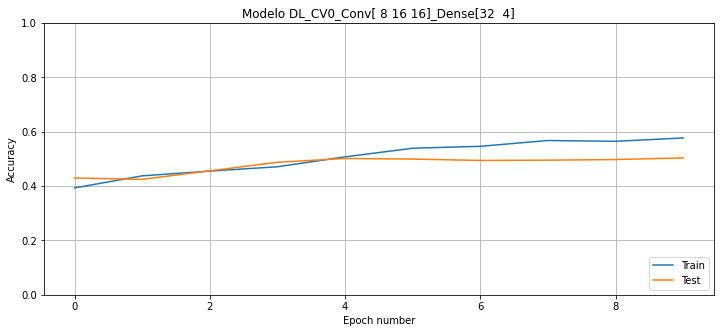

94/94 [==============================] - 1s 13ms/step - loss: 1.1352 - accuracy: 0.5037 - auc: 0.7639 - recall: 0.3118 - precision: 0.5905 - f1_score: 0.4062
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 16)        2320      
_________________________________________________________________
flatten_1 (Flatten)         

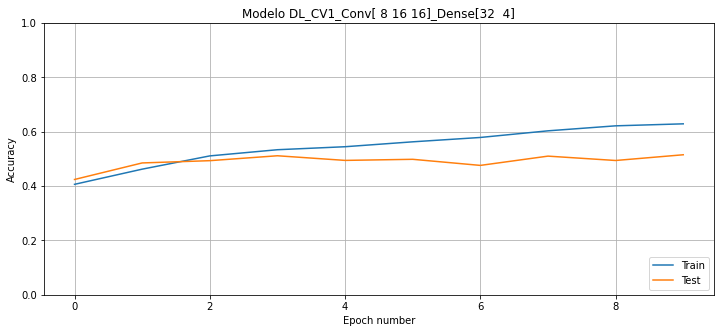

94/94 [==============================] - 1s 12ms/step - loss: 1.1608 - accuracy: 0.5152 - auc: 0.7638 - recall: 0.3440 - precision: 0.5870 - f1_score: 0.4326
Con CV = 2 , conNeurons = [ 8 16 16] y denseNeurons = [64  4]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 16)        2320      
________________________________

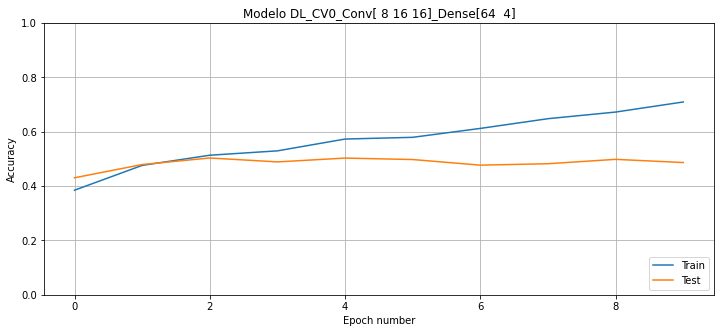

94/94 [==============================] - 1s 12ms/step - loss: 1.3205 - accuracy: 0.4866 - auc: 0.7467 - recall: 0.3957 - precision: 0.5216 - f1_score: 0.4507
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
flatten_3 (Flatten)         

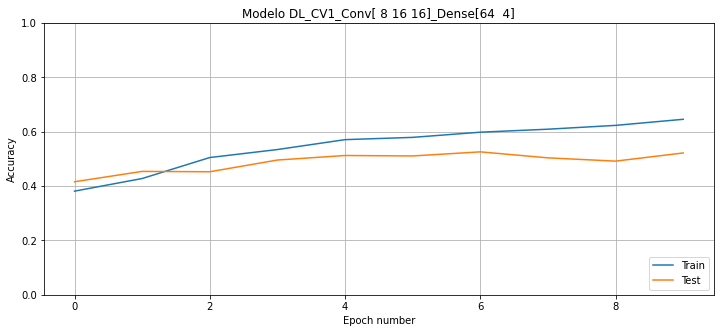

94/94 [==============================] - 1s 12ms/step - loss: 1.1438 - accuracy: 0.5219 - auc: 0.7682 - recall: 0.3504 - precision: 0.5881 - f1_score: 0.4363
Con CV = 2 , conNeurons = [ 8 16 16] y denseNeurons = [128   4]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 16)        2320      
______________________________

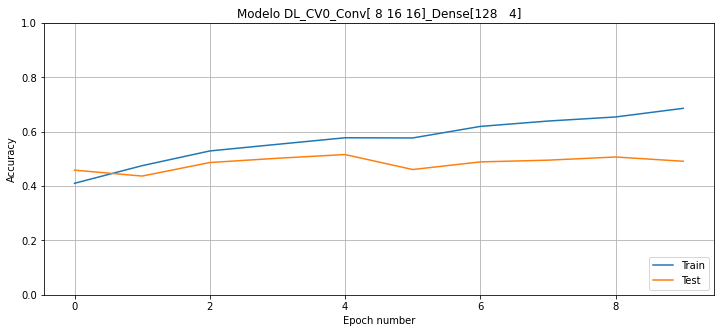

94/94 [==============================] - 1s 12ms/step - loss: 1.2269 - accuracy: 0.4913 - auc: 0.7499 - recall: 0.3797 - precision: 0.5525 - f1_score: 0.4487
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
flatten_5 (Flatten)         

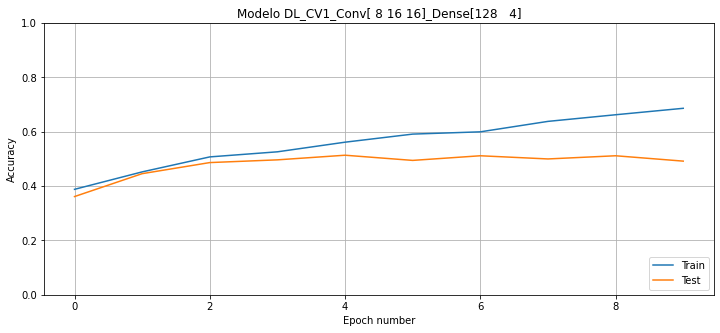

94/94 [==============================] - 1s 12ms/step - loss: 1.2351 - accuracy: 0.4918 - auc: 0.7535 - recall: 0.3698 - precision: 0.5315 - f1_score: 0.4344
Con CV = 2 , conNeurons = [16 16 16] y denseNeurons = [32  4]
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 16)        2320      
________________________________

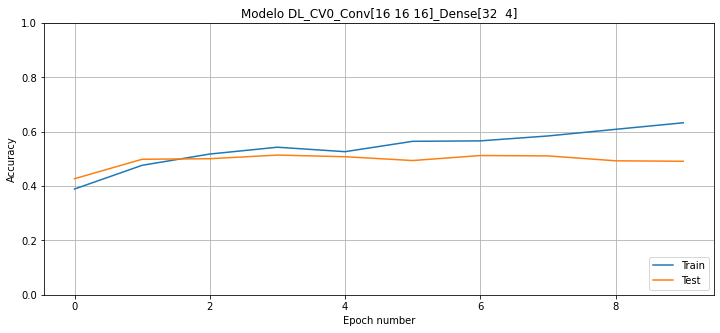

94/94 [==============================] - 1s 12ms/step - loss: 1.1514 - accuracy: 0.4913 - auc: 0.7590 - recall: 0.3339 - precision: 0.5741 - f1_score: 0.4203
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
flatten_7 (Flatten)         

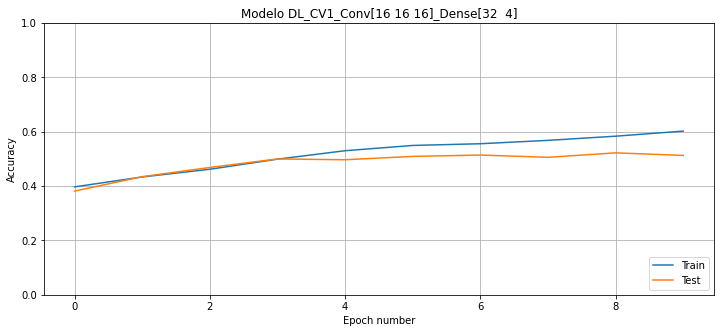

94/94 [==============================] - 1s 13ms/step - loss: 1.1507 - accuracy: 0.5129 - auc: 0.7724 - recall: 0.3808 - precision: 0.5895 - f1_score: 0.4601
Con CV = 2 , conNeurons = [16 16 16] y denseNeurons = [64  4]
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 16)        2320      
________________________________

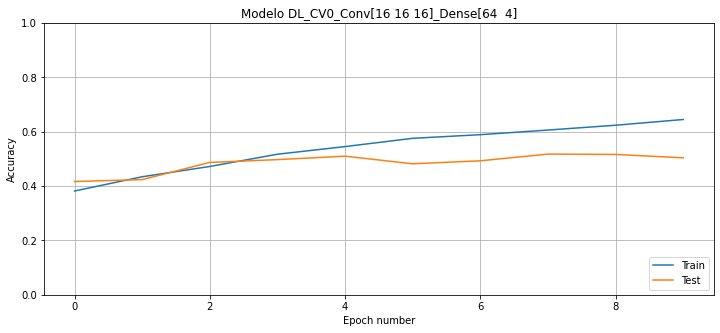

94/94 [==============================] - 1s 10ms/step - loss: 1.1734 - accuracy: 0.5040 - auc: 0.7663 - recall: 0.3944 - precision: 0.5793 - f1_score: 0.4683
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
flatten_9 (Flatten)         

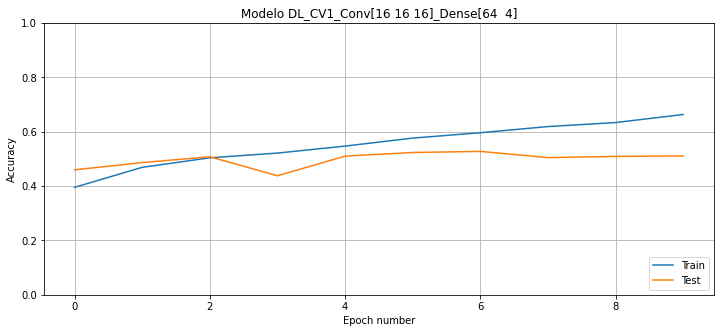

94/94 [==============================] - 1s 11ms/step - loss: 1.1480 - accuracy: 0.5109 - auc: 0.7718 - recall: 0.3601 - precision: 0.5815 - f1_score: 0.4445
Con CV = 2 , conNeurons = [16 16 16] y denseNeurons = [128   4]
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 12, 12, 16)        2320      
_____________________________

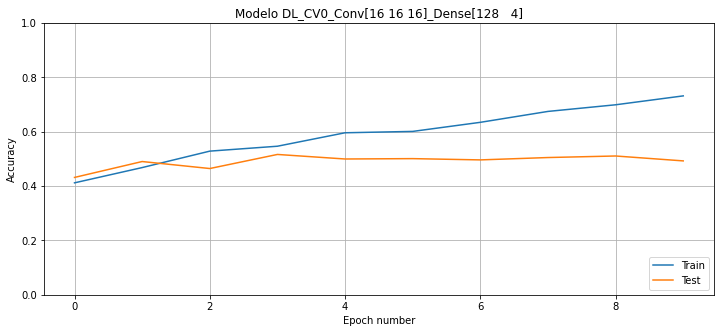

94/94 [==============================] - 1s 11ms/step - loss: 1.2475 - accuracy: 0.4926 - auc: 0.7505 - recall: 0.3817 - precision: 0.5420 - f1_score: 0.4477
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 16)        2320      
_________________________________________________________________
flatten_11 (Flatten)       

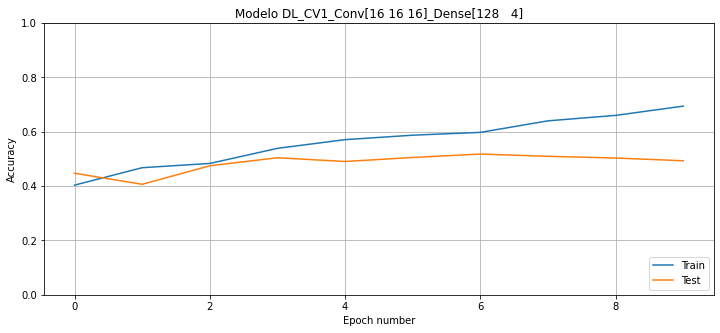

94/94 [==============================] - 1s 10ms/step - loss: 1.2864 - accuracy: 0.4931 - auc: 0.7460 - recall: 0.4076 - precision: 0.5413 - f1_score: 0.4645
Con CV = 2 , conNeurons = [16 32 32] y denseNeurons = [32  4]
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 12, 12, 32)        9248      
_______________________________

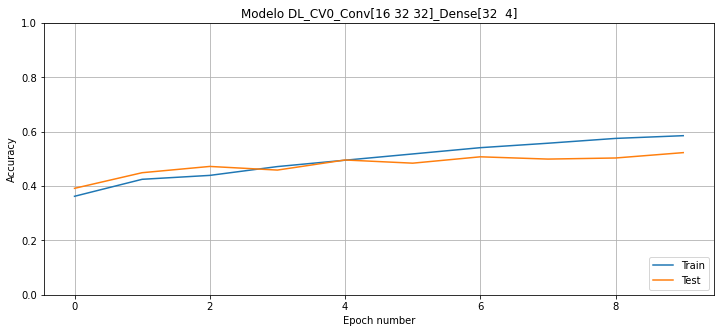

94/94 [==============================] - 1s 11ms/step - loss: 1.1174 - accuracy: 0.5231 - auc: 0.7772 - recall: 0.3620 - precision: 0.5912 - f1_score: 0.4489
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
flatten_13 (Flatten)       

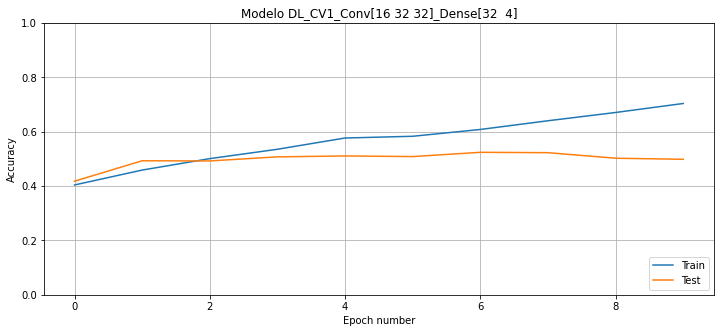

94/94 [==============================] - 1s 11ms/step - loss: 1.2931 - accuracy: 0.4985 - auc: 0.7530 - recall: 0.4069 - precision: 0.5414 - f1_score: 0.4636
Con CV = 2 , conNeurons = [16 32 32] y denseNeurons = [64  4]
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 12, 12, 32)        9248      
_______________________________

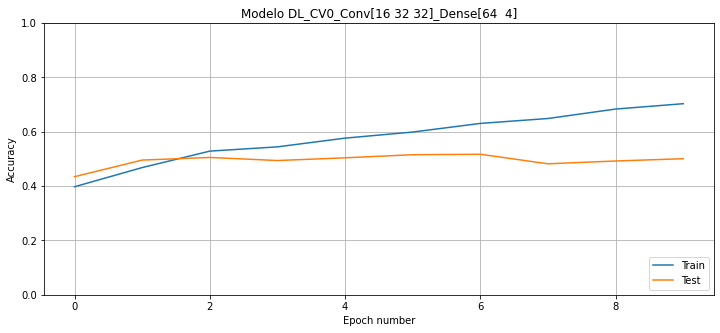

94/94 [==============================] - 1s 10ms/step - loss: 1.2134 - accuracy: 0.5007 - auc: 0.7565 - recall: 0.3760 - precision: 0.5539 - f1_score: 0.4457
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
flatten_15 (Flatten)       

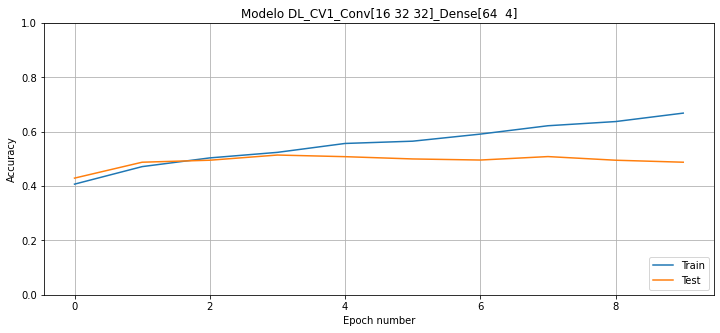

94/94 [==============================] - 1s 11ms/step - loss: 1.2789 - accuracy: 0.4878 - auc: 0.7390 - recall: 0.3852 - precision: 0.5401 - f1_score: 0.4490
Con CV = 2 , conNeurons = [16 32 32] y denseNeurons = [128   4]
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 12, 12, 32)        9248      
_____________________________

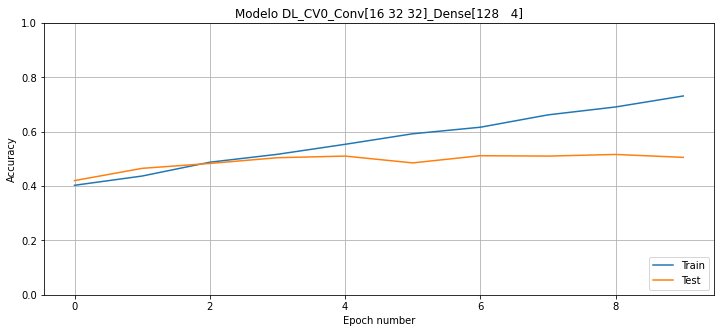

94/94 [==============================] - 1s 11ms/step - loss: 1.2836 - accuracy: 0.5057 - auc: 0.7581 - recall: 0.4191 - precision: 0.5549 - f1_score: 0.4786
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
flatten_17 (Flatten)       

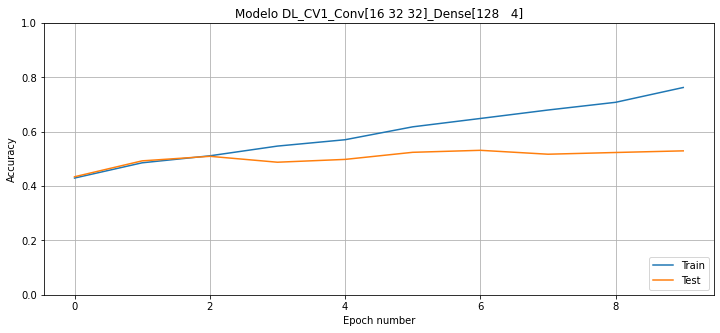

94/94 [==============================] - 1s 11ms/step - loss: 1.3360 - accuracy: 0.5296 - auc: 0.7682 - recall: 0.4580 - precision: 0.5567 - f1_score: 0.5021


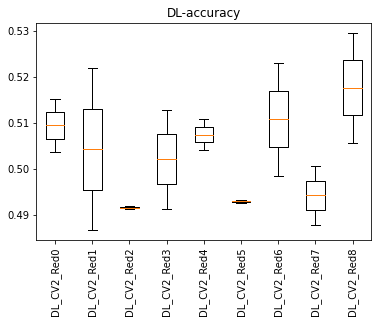

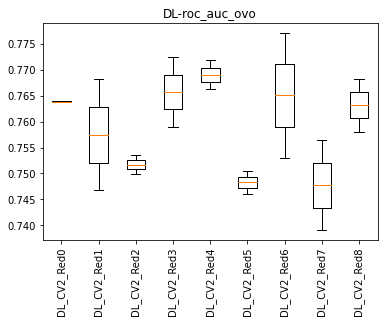

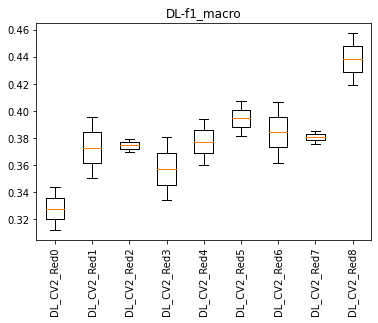

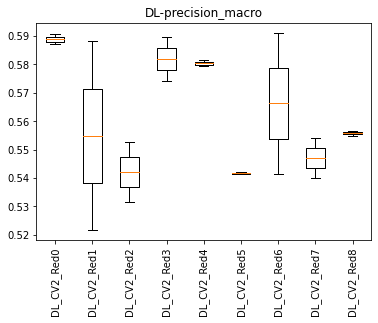

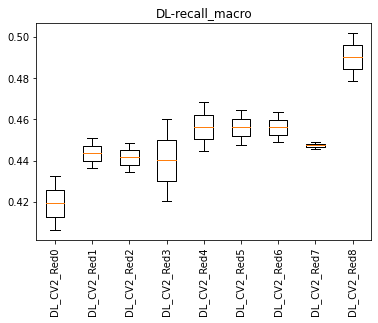

In [7]:
# Entrenamiento Keras
print("Iniciando entrenamiento red convolucional con keras")
CV = np.arange(start = 5, stop = 6, step = 1)
ler = 0.001
batch = 64 
epochs = 10
conNeurons = np.array([[8, 16, 16], [16, 16, 16], [16, 32, 32]])
denseNeurons = np.array([[32, 4], [64, 4], [128, 4]])
scoresDL = dict()
red = 0

for cv in CV:
    for convolucion in conNeurons:
        for densa in denseNeurons:
            print('Con CV =', cv, ', conNeurons =', convolucion, 'y denseNeurons =', densa)
            scoresDL['DL_CV' + str(cv) + '_Red' + str(red)] = conv(X = X_3Dnorm, Y = t_num, cv = cv, conNeurons = convolucion, denseNeurons = densa, ler = ler,  batch = batch, epochs = epochs, resolucion = resolucion)
            red += 1

# Imprimir graficas
for metric in ['accuracy','roc_auc_ovo','f1_macro', 'precision_macro', 'recall_macro']:
    cajas(scoresDL, metric, 'DL-' + str(metric))

### Grabar a excel

In [11]:
# Grabar a Excel los datos obtenidos para cada tecnica y con la variacion de hiperparametros estudiada
saveToExcel(scoresDTC, 'scoresLR.xlsx')
saveToExcel(scoresRF, 'scoresRF.xlsx')
saveToExcel(scoresKNN, 'scoresKNN.xlsx')
saveToExcel(scoresDL, 'scoresDL.xlsx')

### Contraste de hipotesis

In [20]:
opcionDTC = 'DTC_CV5_splits3_leafs3'
opcionKNN = 'KNN_CV5_neigh100'
opcionRF = 'RF_CV5_trees80'
opcionDL = 'DL_CV2_Red8'

In [23]:
contraste(accuracy1 = scoresDTC[opcionDTC]['accuracy'], accuracy2 = scoresKNN[opcionKNN]['accuracy'], accuracy3 = scoresRF[opcionRF]['accuracy'], accuracy4 = scoresDL[opcionDL]['accuracy'], alpha = 0.1)

p-valor KrusW: 0.08331630551120184
p-valor ANOVA: 0.0003349422290794901
Rechazamos la hipótesis: los modelos son diferentes

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.01, alphacBonf=0.008
group1 group2    stat    pval  pval_corr reject
-----------------------------------------------
model1 model2  -42.3333  0.015    0.0601  False
model1 model3    -2.871 0.2134    0.4268  False
model1 model4  -76.0538 0.0084    0.0419   True
model2 model3    1.1176 0.4647    0.4647  False
model2 model4 -104.0252 0.0061    0.0367   True
model3 model4  -11.0116 0.0577     0.173  False
-----------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.10
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
model1 model2    0.053 0.0526  0.0101  0.096   True
model1 model3   0.0372 0.1486 -0.0058 0.0801  False
model1 model4   0.2102  0.001  0.1673 0.2531   True
model2 model3  -0.0159 0.6545 -0.0588 